# Gradient descent

Gradient descent is in essence an algorithm designed to minimize functions. It is popular in machine learning and statistics for use in minimizing loss functions such as least squares.

The gradient descent algorithim uses the derivative of the loss function to move in the direction where the loss function is "descending".

## 1. Derivatives

The derivative of a function measures the **rate of change** of the values of the function with respect to another quantity. 

We are not going to cover the calculus of derivatives today, but will give examples through explaining their use in gradient descent.

Imagine the derivative as a tangent line on the edge of another function. For example, in the image below, if the black curve was the velocity of a car, the red tangent would represent the derivative of velocity at that point, which is the acceleration of the car.

![derivative](https://camo.githubusercontent.com/2f70b084174b825e3ad88564301f9aaf46997fd3/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f302f30662f54616e67656e745f746f5f615f63757276652e737667)



A derivative of a function indicates whether the function is **increasing or decreasing** based on the value of the derivative. 

* If the function is not changing (the tangent line is flat), **the derivative is 0**
* If the function is increasing (the tangent slope is positive), **the derivative is positive**
* If the function is decreasing (the tangent slope is negative), **the derivative is negative**

## 2. The least squares loss and regression

Recall the least squares loss from yesterday:

### $$\frac{1}{N}\sum_{i=1}^N{\left(y_i - \hat{y}_i\right)^2}$$

As well as the formula for a linear regression with a single predictor variable:

### $$y = \beta_0 + \beta_1x_1$$

We can redefine the loss function, inserting the regression formula:

### $$\frac{1}{N}\sum_{i=1}^N{\left(y_i - (\beta_0 + \beta_1x_i)\right)^2}$$

## 3. Partial derivatives of the loss functions

We are going to calculate the two **partial derivatives** of the loss function. Partial derivatives are derivatives with respect to one variable while keeping the other variables constant. Our partial derivatives will be:

* The derivative of the loss function with respect to beta0 (the intercept)
* The derivative of the loss function with respect to beta1 (the slope/coefficient for x1)

This is because the error function is defined by these two parameters. In other words, the value of the error function depends on the changes in beta0 and beta1. 

What about x and y? Those variables affect the calculation of the loss, but they are not changing.

(I've basically forgotten my calculus and differentiation, but I looked up the partial derivatives.)

**The partial derivative with respect to beta0:**

### $$\frac{\delta}{\delta\beta_0} = \frac{2}{N}\sum_{i=1}^N{-\left(y_i - (\beta_0 + \beta_1x_1)\right)}$$

**The partial derivative with respect to beta1:**

### $$\frac{\delta}{\delta\beta_1} = \frac{2}{N}\sum_{i=1}^N{-x_i\left(y_i - (\beta_0 + \beta_1x_1)\right)}$$



So what are we going to do with these partial derivatives?

Recall that a positive derivative indicates an increasing function and a negative derivative indicates a decreasing function. 

If we subtract a fraction of the partial derivative of beta1 from beta1, and subtract a fraction of the partial derivative of beta0 from beta0, we will modify beta1 and beta0 such that the value of the error function shrinks!

We can repeat this incremental process until we reach the minimum of the function.

This is called gradient descent because **we are iteratively moving down the gradient of the error function to its minimum.**

![](https://upload.wikimedia.org/wikipedia/commons/7/79/Gradient_descent.png)

## 4. Coding the gradient descent algorithm

We will now code the gradient descent algorithm to find the optimal intercept and slope for a least squares linear regression model with one predictor.

Load some packages:

In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

### The mean squared error loss function

This function calculates the mean of the squared errors and will serve as our evaluator of the performace of our model:

In [2]:
def mean_squared_error(y_true, x, beta0, beta1):
    y_pred = beta0 + x * beta1
    mean_sq_err = np.mean((y_true - y_pred)**2)
    return mean_sq_err

### Gradient update function

This will update the values beta0 and beta1 using the partial derivatives and a step size to move along the gradient towards the minimum.

In [3]:
def gradient_update(y, x, beta0, beta1, step_size):
    
    beta0_gradient = 0
    beta1_gradient = 0
    
    N = float(len(y))
    
    for i in range(len(y)):
        
        # add to the beta0 gradient for each x,y using the partial derivative with respect to beta0
        beta0_gradient += (2./N * -1 * (y[i] - (beta0 + beta1*x[i])))
        
        # add to the beta1 gradient for each x,y using the partial derivative with respect to beta1
        beta1_gradient += (2./N * -1 * x[i] * (y[i] - (beta0 + beta1*x[i])))
        
    # update beta0 and beta1:
    beta0 = beta0 - (step_size * beta0_gradient)
    beta1 = beta1 - (step_size * beta1_gradient)
    
    return [beta0, beta1]

### Gradient descent iteration function

The last function will iterate multiple times, calling the gradient update function to incrementally change beta0 and beta1

In [13]:
def gradient_descent_iterator(y, x, beta0, beta1, step_size=.0001, iterations=500):
    
    mean_squared_errors = []
    mean_squared_errors.append(mean_squared_error(y, x, beta0, beta1))
    
    beta0s = [beta0]
    beta1s = [beta1]
    
    for i in range(iterations):
        [beta0, beta1] = gradient_update(y, x, beta0, beta1, step_size)
        mean_squared_errors.append(mean_squared_error(y, x, beta0, beta1))
        beta0s.append(beta0)
        beta1s.append(beta1)
        
    return [mean_squared_errors, beta0s, beta1s]

## 5. Run gradient descent on regression data

First lets make some x and y variables like we did yesterday.

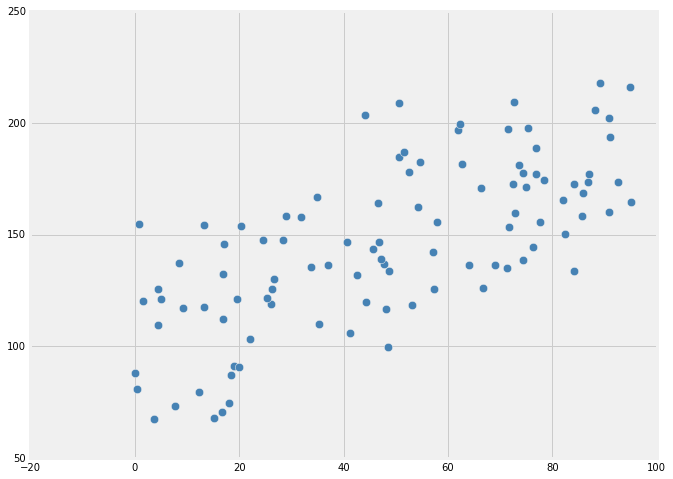

In [14]:
x = np.random.random_sample(100)*100
y = x + np.random.normal(np.random.normal(0,15), 30, size=100) + 100

plt.figure(figsize=(10,8))

plt.scatter(x, y, s=70, c='steelblue')

plt.show()

Then run the gradient descent algorithm, starting beta1 and beta0 both at 0.

In [15]:
[mses, beta0s, beta1s] = gradient_descent_iterator(y, x, 0, 0)

## 6. Plot the iterations of errors and betas

You can see that with each iteration the mean squared error iteratively decreases:

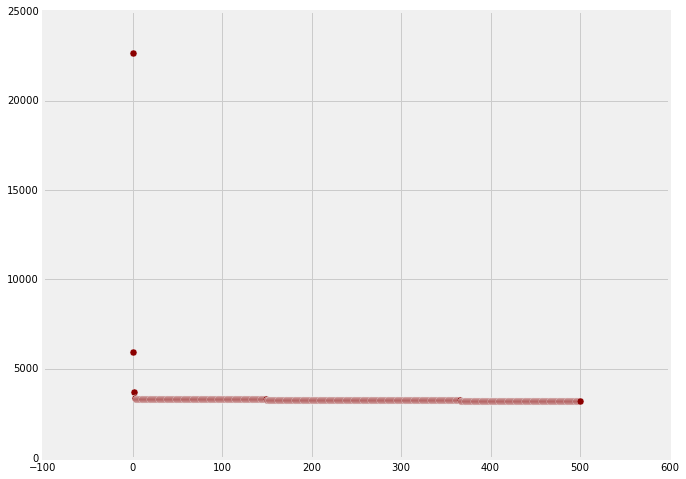

In [16]:
plt.figure(figsize=(10,8))
plt.scatter(range(len(mses)), mses, s=50, c='darkred')
plt.show()

We can also plot the path of the beta0s and beta1s:

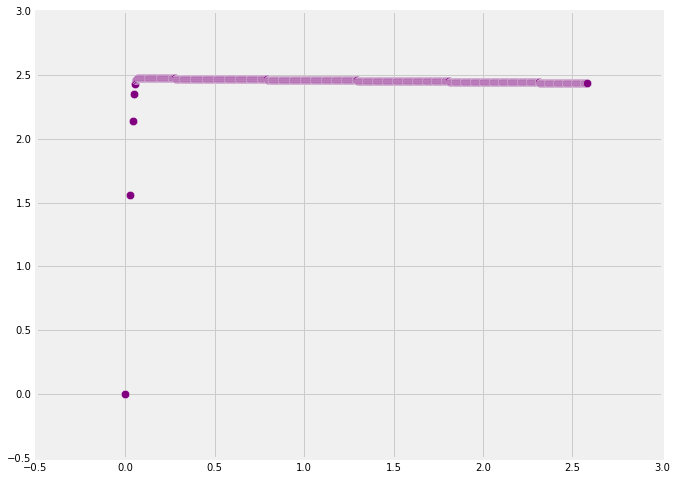

In [17]:
plt.figure(figsize=(10,8))
plt.scatter(beta0s, beta1s, s=70, c='purple')
plt.show()

And the regression lines at different points in the gradient descent process:

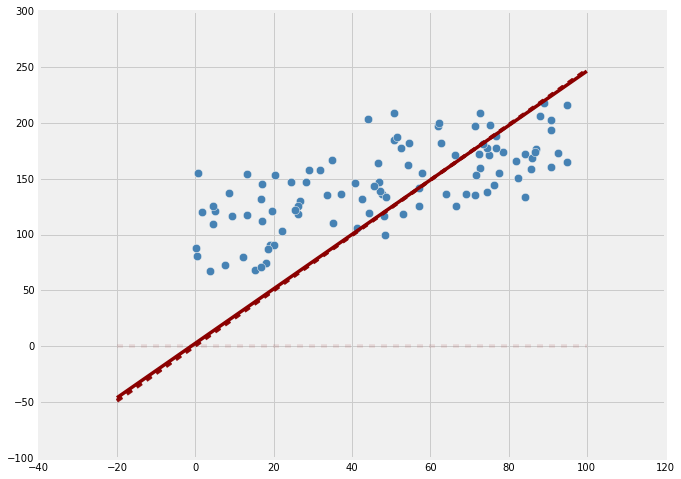

In [18]:
plt.figure(figsize=(10,8))
axes = plt.gca()
plt.scatter(x, y, s=70, c='steelblue')

x_points = np.linspace(axes.get_xlim()[0], axes.get_xlim()[1], 100)
plt.plot(x_points, x_points*beta1s[0] + beta0s[0], c='darkred', lw=3.5, ls='dashed', alpha=0.1)
plt.plot(x_points, x_points*beta1s[25] + beta0s[25], c='darkred', lw=3.5, ls='dashed', alpha=0.2)
plt.plot(x_points, x_points*beta1s[50] + beta0s[50], c='darkred', lw=3.5, ls='dashed', alpha=0.3)
plt.plot(x_points, x_points*beta1s[50] + beta0s[75], c='darkred', lw=3.5, ls='dashed', alpha=0.4)
plt.plot(x_points, x_points*beta1s[100] + beta0s[100], c='darkred', lw=3.5, ls='dashed', alpha=0.6)
plt.plot(x_points, x_points*beta1s[150] + beta0s[150], c='darkred', lw=3.5, ls='dashed', alpha=0.8)
plt.plot(x_points, x_points*beta1s[-1] + beta0s[-1], c='darkred', lw=3.5, alpha=1.0)

plt.show()

## 7.  Gradient descent can fail

One of the most fickle things about gradient descent is the step size (also known as learning rate). If this is not tuned properly, the algorithm may never converge and in fact explode into extreme values.

Gradient descent also only works where there is a gradient to follow. Here is a toy example of a function where gradient descent will fail:

$$f(x, y) = \begin{cases}
2 x^2 & \quad \text{if $x \leq 1$}\\
2  & \quad \text{else}
\end{cases}$$

Gradient descent code for the function:

In [19]:
def func(x):
    if x <= 1:
        return 2 * x * x
    return 2

def gradient(x):
    if x <= 1:
        return 4 * x
    return 0

def gradient_descent(x, l=0.1):
    vector = np.array(x)
    return vector - l * np.array(gradient(x))


def iterate(x0, n=10):
    xs = [x0]
    ys = [func(x0)]
    for i in range(n):
        x = gradient_descent(xs[-1], l=0.1)
        xs.append(x)
        ys.append(func(x))
    return xs, ys

Run the gradient descent algorithm starting at **x = -1.5** first, then try it at **x = 2**:

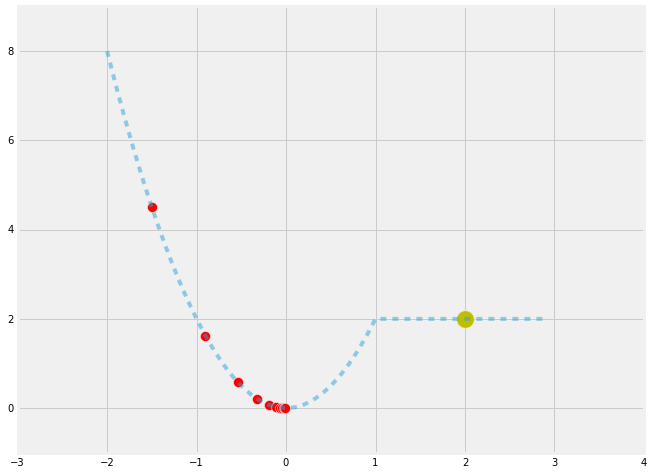

In [20]:
xs = np.arange(-2, 3, 0.1)
ys = map(func, xs)

plt.figure(figsize=(10,8))
plt.plot(xs, ys, alpha=0.5, ls='dashed')

# Start gradient descent at x = -1.5
xs2, ys2 = iterate(-1.5, n=10)
plt.scatter(xs2, ys2, c='r', s=100)

# Start gradient descent at x = 2
xs2, ys2 = iterate(2, n=10)
plt.scatter(xs2, ys2, c='y', s=300)